In [1]:
from pandas_datareader import data
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


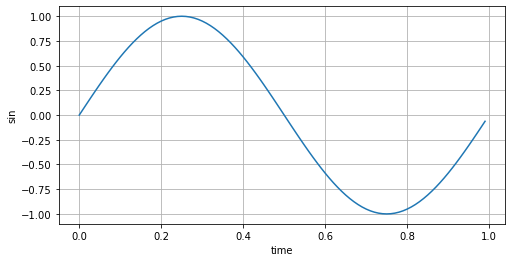

In [6]:
import matplotlib.pyplot as plt
import numpy as np

def plotSinWave(**kwargs):
    #기본값 설정
    endTime = kwargs.get("endTime",1)
    sampleTime = kwargs.get("sampleTime",0.01)
    amp = kwargs.get("amp",1)
    freq = kwargs.get("freq",1)
    startTime = kwargs.get("startTime",0)
    bias = kwargs.get("bias",0)
    figsize = kwargs.get("figsize",(12,6))

    time = np.arange(startTime, endTime, sampleTime)
    result = amp*np.sin(2*np.pi * freq*time + startTime)+bias
    plt.figure(figsize=(8,4))
    plt.plot(time,result)
    plt.grid(True)
    plt.xlabel("time")
    plt.ylabel("sin")
    plt.show();
plotSinWave()

In [8]:
import pandas as pd
#fbprophet
# fbprophet에서 원하는 형태
# 컬럼명 ds, y
# 2020-01-01 | y축
ds = pd.date_range("2018-01-01",periods=365*2,freq="D")
time = np.linspace(0,1,365*2)
result = np.sin(2*np.pi*12*time)
df = pd.DataFrame({
    "ds": ds,
    "y": result 
})
df.head() 

,ds,y
0,2018-01-01,0.000000
1,2018-01-02,0.103243
2,2018-01-03,0.205382
3,2018-01-04,0.305326
4,2018-01-05,0.402007


In [10]:
#Prophet은 객체를 1번만 fit할 수 있다
# 여러번 fit하고 싶으면 새로운 객체 생성 필요
from fbprophet import Prophet
# 객체생성하고
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
# fit
m.fit(df)

In [12]:
# 미래 dataframe 생성
future = m.make_future_dataframe(periods=30)
# 예측
forecast = m.predict(future)

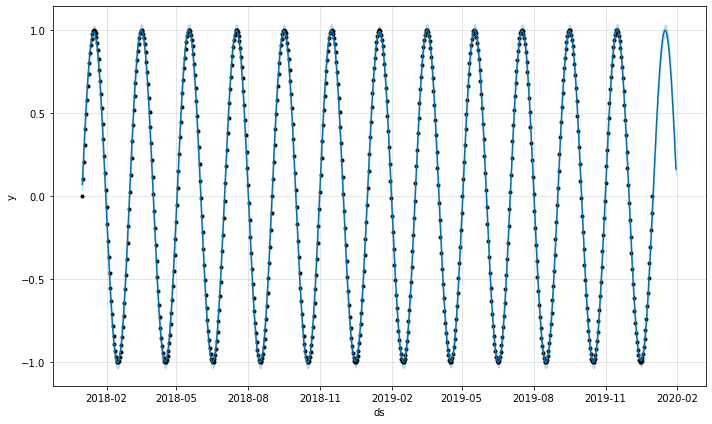

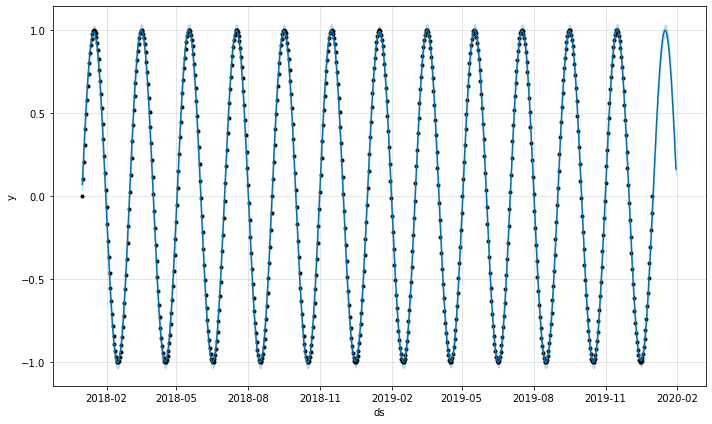

In [13]:
m.plot(forecast)

In [14]:
# 예측 결과는 상한/하한의 범위를 포함해서 얻어진다.
forecast = m.predict(future)
forecast[ ["ds", "yhat","yhat_lower","yhat_upper"]].tail() #많은 컬럼중에... 4개만 선택


,ds,yhat,yhat_lower,yhat_upper
755,2020-01-26,0.542875,0.505996,0.578748
756,2020-01-27,0.453850,0.417545,0.487584
757,2020-01-28,0.360721,0.325530,0.398781
758,2020-01-29,0.263046,0.227758,0.297608
759,2020-01-30,0.163234,0.125636,0.197683
